In [4]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [3]:
!pip install insightface
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.2 MB/s eta 0:00:00


In [5]:
print ('insightface', insightface.__version__)
print ('numpy' ,np.__version__)

insightface 0.7.3
numpy 1.26.4


In [8]:
app = FaceAnalysis(name= 'buffalo_l')
app.prepare(ctx_id=0, det_size= (640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


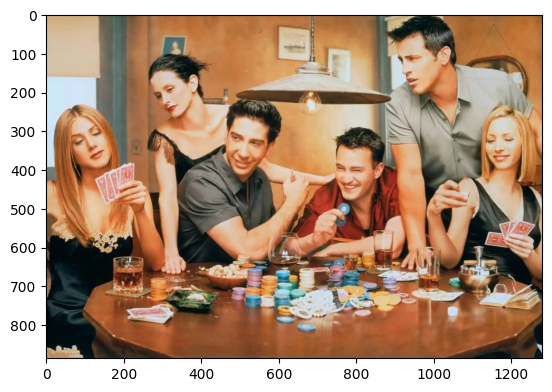

In [14]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [15]:
faces = app.get(img)

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [16]:
len(faces)

6

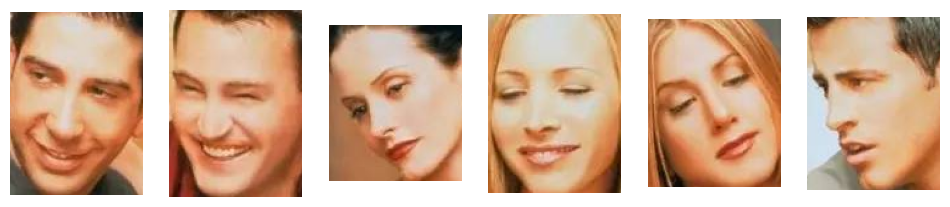

In [17]:

fig, axs = plt.subplots(1, 6, figsize= (12, 5))
for i, face in enumerate(faces):
  bbox = face['bbox']
  bbox = [int(b) for b in bbox]
  axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
  axs[i].axis('off')

In [22]:
import gdown

# Extracted file ID from your Google Drive link
file_id = '1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF'

# Download the file using gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'inswapper_128.onnx', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF
From (redirected): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF&confirm=t&uuid=d47d0518-a293-44f2-a876-90be6c079984
To: /content/inswapper_128.onnx
100%|██████████| 554M/554M [00:03<00:00, 144MB/s]


'inswapper_128.onnx'

In [23]:
import insightface

# Load the model
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip=False)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


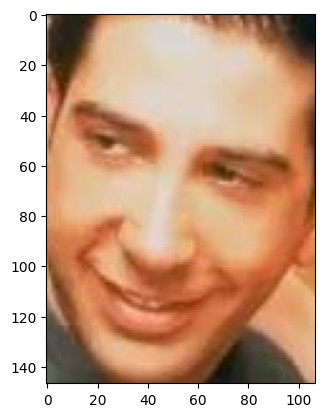

In [24]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img [bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

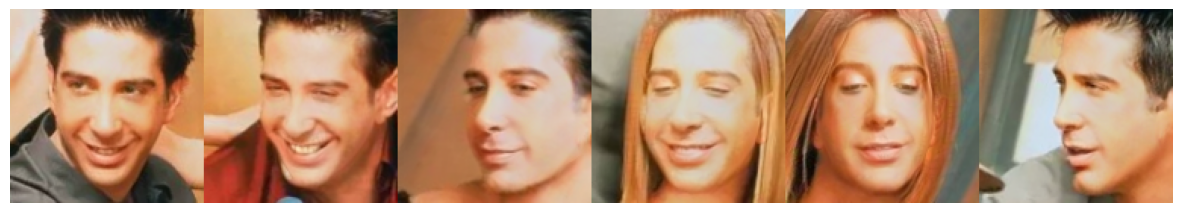

In [26]:
res = []
for face in faces:
  _img, _ = swapper.get(img, face, source_face, paste_back=False)
  res.append(_img)
res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize = (15, 5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

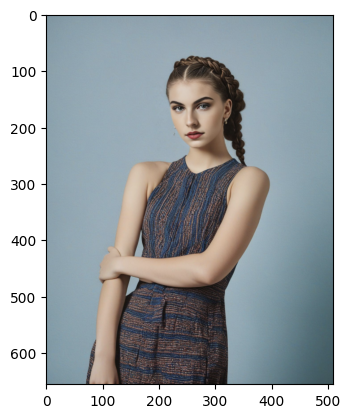

In [44]:
target = cv2.imread('/content/target_lady.png')
plt.imshow(target[:,:,::-1])
plt.show()

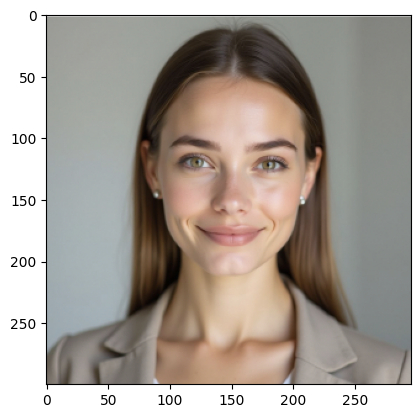

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [50]:
source_lady = cv2.imread('/content/source_lady.png')
plt.imshow(source_lady[:,:,::-1])
plt.show()

lady_faces = app.get(source_lady)
lady_face = lady_faces[0]

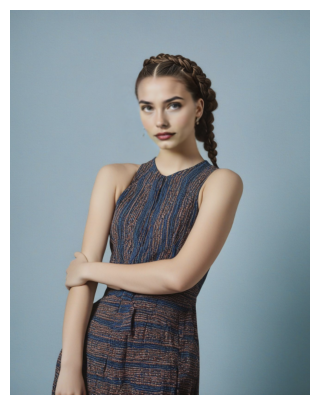

In [51]:
faces = app.get(target)
res = target.copy()

for face in faces:
  res = swapper.get(res, face, lady_face, paste_back=True)

fig, ax = plt.subplots(figsize = (15, 5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()